# First Jupyter project

## Helicopter Escapes!!!

We begin by importing some helper functions

In [7]:
from helper import *

## Get the Data

Now, let's get the data from the [List of helicopter prison escapes](https://en.wikipedia.org/wiki/List_of_helicopter_prison_escapes) Wikipedia article.

In [8]:
url = 'https://en.wikipedia.org/wiki/List_of_helicopter_prison_escapes'

In [52]:
data1 = data_from_url(url)

Let's print the first three rows

In [53]:
for row in data1[:3]:
    print(row)

['August 19, 1971', 'Santa Martha Acatitla', 'Mexico', 'Yes', 'Joel David Kaplan Carlos Antonio Contreras Castro', "Joel David Kaplan was a New York businessman who had been arrested for murder in 1962 in Mexico City and was incarcerated at the Santa Martha Acatitla prison in the Iztapalapa borough of Mexico City. Joel's sister, Judy Kaplan, arranged the means to help Kaplan escape, and on August 19, 1971, a helicopter landed in the prison yard. The guards mistakenly thought this was an official visit. In two minutes, Kaplan and his cellmate Carlos Antonio Contreras, a Venezuelan counterfeiter, were able to board the craft and were piloted away, before any shots were fired.[9] Both men were flown to Texas and then different planes flew Kaplan to California and Contreras to Guatemala.[3] The Mexican government never initiated extradition proceedings against Kaplan.[9] The escape is told in a book, The 10-Second Jailbreak: The Helicopter Escape of Joel David Kaplan.[4] It also inspired t

## Removing the details in each row

Initialize an index with 0 to keep track of what we are modifying.

In [57]:
index = 0

for row in data1:
    data1[index] = row[:-1] 
    index += 1

In [59]:
print(data1[:3])

[['August 19, 1971', 'Santa Martha Acatitla', 'Mexico', 'Yes', 'Joel David Kaplan Carlos Antonio Contreras Castro'], ['October 31, 1973', 'Mountjoy Jail', 'Ireland', 'Yes', "JB O'Hagan Seamus TwomeyKevin Mallon"], ['May 24, 1978', 'United States Penitentiary, Marion', 'United States', 'No', 'Garrett Brock TrapnellMartin Joseph McNallyJames Kenneth Johnson']]


## Extracting the year

In the code cell below, we iterate over data using the variable row and:  
     &emsp;-  With every occurrence of `row[0]`, we refer to the first entry of row, i.e., the date.  
     &emsp;-  Thus, with `date = fetch_year(row[0])`, we're extracting the year out of the date in `row[0]` and assiging it to the variable date.  
     &emsp;-  We then replace the value of `row[0]` with the year that we just extracted.

In [61]:
for row in data1:
    date = fetch_year(row[0])
    row[0] = date

In [74]:
print(data1[:3])

[[1971, 'Santa Martha Acatitla', 'Mexico', 'Yes', 'Joel David Kaplan Carlos Antonio Contreras Castro'], [1973, 'Mountjoy Jail', 'Ireland', 'Yes', "JB O'Hagan Seamus TwomeyKevin Mallon"], [1978, 'United States Penitentiary, Marion', 'United States', 'No', 'Garrett Brock TrapnellMartin Joseph McNallyJames Kenneth Johnson']]


# Attempts per year

In [94]:
min_year = min(data1, key=lambda x: x[0])[0]
max_year = max(data1, key=lambda x: x[0])[0]

Before we move on, let's check what are the earliest and latest dates we have in our dataset

In [95]:
print(min_year)
print(max_year)

1971
2020


Now we'll create a list of all the years ranging from min_year to max_year. Our goal is to then determine how many prison breaks attempts there were for each eyar. Since years in which there weren't any prison breaks aren't present in the dataset, this will make sure to capture them.

In [98]:
years = []
for y in range(min_year, max_year + 1):
    years.append(y)

In [99]:
print(years)

[1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020]


Now we create a list where each element looks like `[,0]`

In [109]:
attempts_per_year = []
for y in years:
    attempts_per_year.append([y,0])

And finally we increment the second entry(at index 1) by 1 each time a year appears in the data.

In [110]:
for row in data1:
    for ya in attempts_per_year:
        y = ya[0]
        if row[0] == y:
            ya[1] += 1
            
print(attempts_per_year)

[[1971, 1], [1972, 0], [1973, 1], [1974, 0], [1975, 0], [1976, 0], [1977, 0], [1978, 1], [1979, 0], [1980, 0], [1981, 2], [1982, 0], [1983, 1], [1984, 0], [1985, 2], [1986, 3], [1987, 1], [1988, 1], [1989, 2], [1990, 1], [1991, 1], [1992, 2], [1993, 1], [1994, 0], [1995, 0], [1996, 1], [1997, 1], [1998, 0], [1999, 1], [2000, 2], [2001, 3], [2002, 2], [2003, 1], [2004, 0], [2005, 2], [2006, 1], [2007, 3], [2008, 0], [2009, 3], [2010, 1], [2011, 0], [2012, 1], [2013, 2], [2014, 1], [2015, 0], [2016, 1], [2017, 0], [2018, 1], [2019, 0], [2020, 1]]


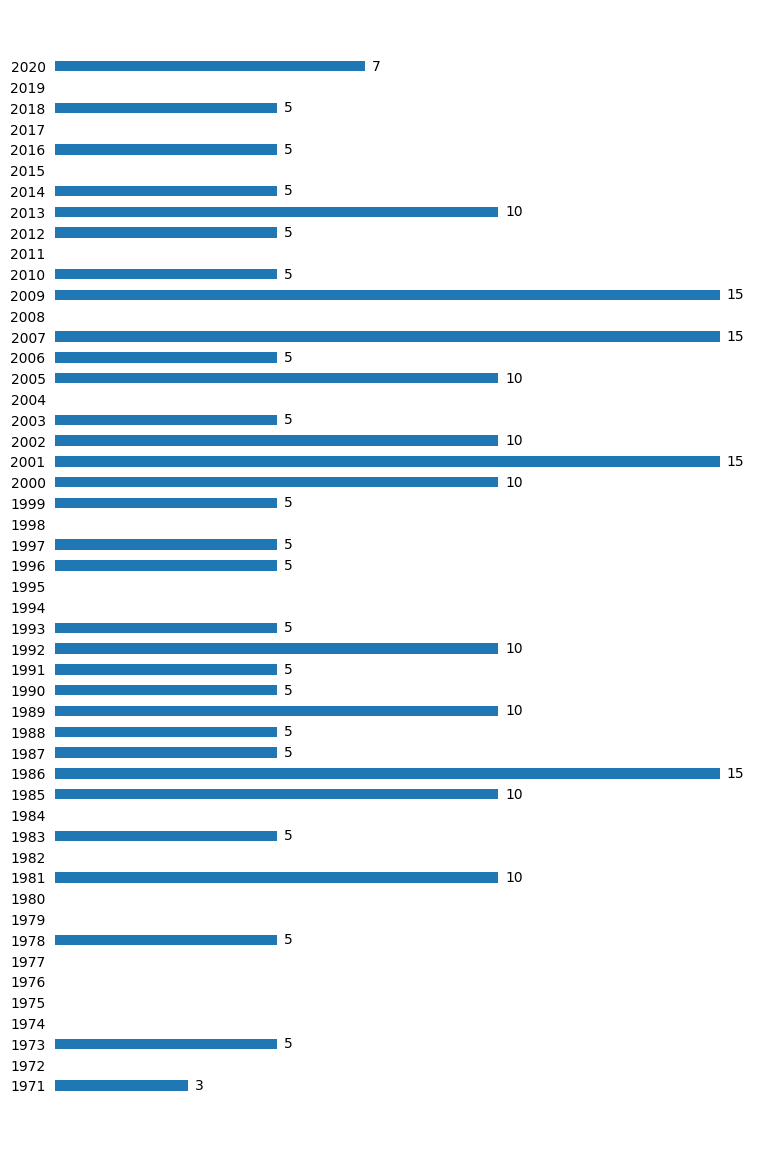

In [107]:
%matplotlib inline
barplot(attempts_per_year)

The year with the most helicopter prison break attempts were 1986, 2001, 2007 and 2009, with three attempts each.

## Attempts by country

In [112]:
countries_frequency = df["Country"].value_counts()
print_pretty_table(countries_frequency)

Country,Number of Occurrences
France,15
United States,8
Greece,4
Canada,4
Belgium,4
United Kingdom,2
Australia,2
Brazil,2
Russia,1
Ireland,1
